# Task 2 : Prediction using Unsupervised ML
From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.<br>
Data at [https://bit.ly/3kXTdox](https://bit.ly/3kXTdox)
## Author : Vedant Kadam

Before doing anything else let's put the import statements at the top.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Now let's download the data and load it into a pandas DataFrame

In [3]:
data=pd.read_csv("Iris.csv",index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Now that we have the dataset let's see how to find the number of clusters to use. This can be determined with the elbow method<br>
In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10.<br> For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster.<br> When we plot the WCSS with the K value, the plot looks like an Elbow.<br> As the number of clusters increases, the WCSS value will start to decrease.<br> WCSS value is largest when K = 1.<br> When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape.<br> From this point, the graph starts to move almost parallel to the X-axis.<br> The K value corresponding to this point is the optimal K value or an optimal number of clusters.

**So let's use the KMeans module of scikitlearn and plot the WCSS value for each value of k**

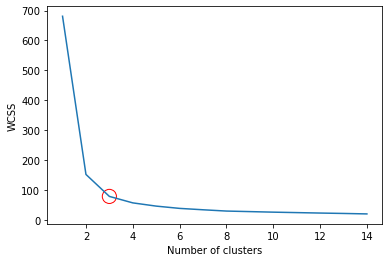

In [4]:
from sklearn.cluster import KMeans
X = data.iloc[:, :4].values
WCSS_vals=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state = 3)
    kmeans.fit(X)
    WCSS_vals.append(kmeans.inertia_)
plt.plot(range(1, 15), WCSS_vals)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.scatter(3,78.94084142614601,s=200,facecolors='none',edgecolors='red')
plt.show()

As we can see from the above graph the elbow in the graph is at **k=3**. So the **ideal value for k is '3'**

Now that we know the ideal k value let's build the classifier and use it to predict the clusters

In [5]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state = 3)
Y=kmeans.fit_predict(X)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Now let's plot a graph to visualise the centroids accuracy.<br> We will have SepalWidthCm on Y axis, SepalLengthCm on X axis and the color will signify the species.

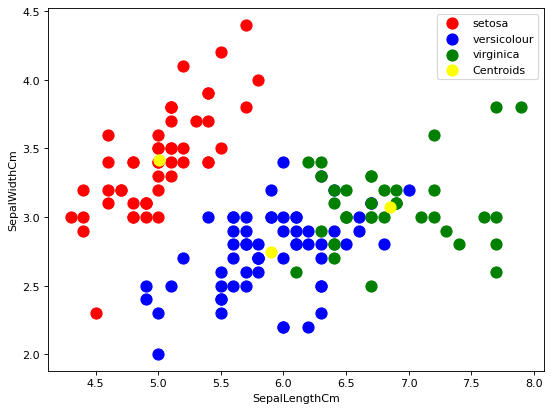

In [6]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X[Y == 0, 0], X[Y == 0, 1],s = 100, c = 'red', label = 'setosa')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1],s = 100, c = 'blue', label = 'versicolour')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1],s = 100, c = 'green', label = 'virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

We can see from this that the centroids are close enough to the species and also are correctly shown in the graph.